<a href="https://colab.research.google.com/github/Bubu52/BEST-PROJECT-IN-THE-WORLD/blob/main/Pry_AMACOR%20v.1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width=600 src="https://impelia.org/wp-content/uploads/2022/08/impelia_logo-cabecera_-02.png">

Hecho por: [Kenny Garcés](https://www.linkedin.com/in/kennygarces/) y [Remei Toda](https://www.linkedin.com/in/remei-toda-ribes-185879119/)

# Análisis de datos supermercados <strong style= 'color: red'>A</strong><strong style= 'color: green'>M</strong><strong style= 'color: orange'>A</strong><strong style= 'color: blue'>C</strong><strong style= 'color: brown'>O</strong><strong style= 'color: purple'>R</strong>


Amacor, un renombrado supermercado con una presencia sólida en la región donde el dueño es José Pérez. Se encuentra en una fase estratégica de mejora continua para fortalecer la eficiencia de sus operaciones. Ya que actualmente se encuentran con ciertos conflictos económicos en la empresa y quieren aumentar su facturación y así evitar posibles depidos. Como parte de este proceso, el equipo de marketing de Amacor ha llevado a cabo una iniciativa ambiciosa para recopilar y analizar datos detallados sobre su inventario de productos. El objetivo es optimizar la gestión del inventario, mejorar la toma de decisiones y garantizar una experiencia de compra excepcional para sus clientes.

El dataset recopilado contiene información crucial, como nombres de productos, categorías, precios, ofertas, cantidades en stock y fechas de exportación del dato. Sin embargo, durante el proceso de revisión, el equipo de marketing ha identificado desafíos sustanciales que requieren atención inmediata. Estos desafíos incluyen la ausencia de valores en ciertas columnas, la existencia de productos duplicados y la posibilidad de inconsistencias en la calidad de los datos.

Esta situación ha llevado al equipo de marketing a pedir ayuda a los data scientist de Impelia. Con el fin, de poder obtener información precisa y confiable, lo que es esencial para la toma de decisiones de manera eficiente y estratégica.

## Metología a seguir

**Análisis Inicial**: Evaluar el impacto de los valores nulos y productos duplicados en el conjunto de datos.
Identificar las columnas clave que serán fundamentales en el proceso de limpieza y análisis.

**Limpieza de Datos**: Desarrollar estrategias para abordar los valores nulos, ya sea mediante la eliminación de registros o la imputación de valores basada en el contexto.
Implementar un procedimiento para eliminar productos duplicados, conservando solo la primera ocurrencia.

**Análisis de Columnas**: Realizar un análisis exhaustivo de cada columna para comprender la naturaleza de los datos y detectar posibles anomalías.
Proponer soluciones para corregir cualquier error o inconsistencia identificada.

**Resumen Estadístico**: Generar un resumen estadístico detallado para las columnas numéricas, aprovechando gráficos y visualizaciones para destacar patrones y tendencias.

**Presentación de Resultados**: Elaborar un informe completo que documente las acciones tomadas en la limpieza de datos y el análisis de los mismos.
El informe deberá responder como mínimo a las siguientes cuestiones:
1. ¿Cúal es el número total de productos?

2. ¿Cuantos productos tienen oferta aplicada?

3. ¿Cuál es el producto más caro?

4. ¿A cuantos productos no les queda Stock?

5. ¿Cuál es el producto más barato?

6. ¿Cuál es el producto con más Stock? ¿Se le está aplicando oferta a este producto?

7. A los producos que se les aplica la oferta, ¿Cuánto dinero se está ahorrando el cliente?

8. ¿Cuál es el producto más barato por pasillos?

9. ¿Cuál es el producto más caro por pasillos?

10. ¿Cuál es el producto con más Stock por pasillos?

11. ¿Qué ocurre con el producto "**<strong style= 'color: red'>Mostaza regular doypack 1000 g</strong>**"? ¿Hay algún otro producto que le ocurra lo mismo?

12. ¿Cuál es la marca con más productos?

13. ¿Cuántos productos hay en cada pasillo?

14. Cambiar los nombres de los productos a en formato mayúsculas y cambiando los espacios por "_".

15. ¿Cuántas variedades de vinos venden? ¿Y cuál es el más caro?

16. ¿Qué pasillo tiene más productos sin ofertas aplicadas?

17. ¿Cuántos productos se venden a granel y cuántos por unidad?

18. ¿Cuántos productos de los que hay en stock se les está aplicando oferta?

19. ¿Qué está ocurriendo con el Producto "**<strong style= 'color: red'>Aceite de Oliva extra virgen 250 ml</strong>**" en temas de oferta y demanda?

20. Ofrece recomendaciones específicas para mejorar la calidad de los datos y sugerir acciones futuras para la gestión del inventario.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Amacor.csv")
df = data.copy()

df.rename(columns = {"title":
"NOMBRE_PRODUCTO"}, inplace = True)
df.rename(columns = {"brand":
"MARCA"}, inplace = True)
df.rename(columns = {"normal_price":
"PRECIO_SIN_OFERTA"}, inplace = True)
df.rename(columns = {"low_price":
"PRECIO_OFERTA_MIN"}, inplace = True)
df.rename(columns = {"high_price":
"PRECIO_OFERTA_MAX"}, inplace = True)
df.rename(columns = {"oferta":
"OFERTA"}, inplace = True)
df.rename(columns = {"categoria1":
"ZONA_SUPERMERCADO"}, inplace = True)
df.rename(columns = {"categoria2":
"TIPO_PRODUCTO"}, inplace = True)
df.rename(columns = {"Atributos":
"ATRIBUTOS"}, inplace = True)
df.rename(columns = {"sin_stock":
"STOCK"}, inplace = True)
df.rename(columns = {"Num_Stock":
"CANTIDAD_STOCK"}, inplace = True)
df.rename(columns = {"datetime":
"DATATIME"}, inplace = True)
df.rename(columns = {"page":
"PAGE"}, inplace = True)

df.isnull().sum()
df.duplicated().sum()

0

In [2]:
df2 = df["NOMBRE_PRODUCTO"].copy()
df2 = df2.value_counts().sum()

In [3]:
duplicados = df[['NOMBRE_PRODUCTO','MARCA','PRECIO_SIN_OFERTA']].duplicated().sum()
df.drop_duplicates(subset=['NOMBRE_PRODUCTO', 'MARCA','PRECIO_SIN_OFERTA'], keep='last',inplace=True)
act = df['NOMBRE_PRODUCTO'].value_counts().sum()
print(f"Antes de limpiar los datos duplicados habian {df2} productos ")
print(f"Despues de eliminar los duplicados hay: {act} productos")

Antes de limpiar los datos duplicados habian 4468 productos 
Despues de eliminar los duplicados hay: 2830 productos


EJECUTAR SOLO UNA VEZ PARA NO DUPLICAR EL RESULTADO.

In [4]:
df["PRECIO_SIN_OFERTA"]=df["PRECIO_SIN_OFERTA"]*0.0011
df["PRECIO_OFERTA_MIN"]=df["PRECIO_OFERTA_MIN"]*0.0011
df["PRECIO_OFERTA_MAX"]=df["PRECIO_OFERTA_MAX"]*0.0011

In [5]:
media_prc = df['PRECIO_SIN_OFERTA'].mean()
df['PRECIO_SIN_OFERTA'].replace(to_replace=0.0,value=media_prc,inplace=True)
media_max = df['PRECIO_OFERTA_MAX'].mean()
df['PRECIO_OFERTA_MAX'].replace(to_replace=0.0,value=media_max,inplace=True)
media_min = df['PRECIO_OFERTA_MIN'].mean()
df['PRECIO_OFERTA_MIN'].replace(to_replace=0.0,value=media_min,inplace=True)

In [6]:
num_pasillos = list(df["ZONA_SUPERMERCADO"].unique())
num_pasillos

['supermercados', 'lacteos', 'frutas-y-verduras', 'carniceria', 'despensa']

In [7]:
lista = []
for i in df["ZONA_SUPERMERCADO"]:
  if i in num_pasillos:
    lista.append(num_pasillos.index(i)+1)
df.insert(7,"NUM_PASILLOS",lista)

1. ¿Cúal es el número total de productos?

In [8]:
num_total = df['NOMBRE_PRODUCTO'].value_counts().sum()
print(f'Esta base de datos tiene un total de {num_total} productos')

Esta base de datos tiene un total de 2830 productos


2. ¿Cuantos productos tienen oferta aplicada?

In [10]:
cond= df[df['OFERTA']==1]
ofrta_apli= cond["OFERTA"].value_counts().sum()
print(f'Hay un total de {ofrta_apli} productos con oferta aplicada')

Hay un total de 623 productos con oferta aplicada


In [11]:
df.groupby('NOMBRE_PRODUCTO')['OFERTA'].value_counts()


NOMBRE_PRODUCTO          OFERTA
Abastero Cat. V          1         1
Aceite Vegetal 1 L       0         1
Aceite Vegetal 900 ml    0         1
Aceite de Coco 350 g     0         1
Aceite de Maravilla 1 L  0         1
                                  ..
Zapallo europeo un.      0         1
Zapallo italiano un.     0         1
Ñoquis Capresse 400 g    0         1
Ñoquis Tricolor 500 g    0         1
Ñoquis de papa 500 g     0         1
Name: OFERTA, Length: 2750, dtype: int64

3.1133652497707818

3. ¿Cuál es el producto más caro?

In [12]:
pd.DataFrame(df.groupby("NOMBRE_PRODUCTO")["PRECIO_SIN_OFERTA"].max().sort_values(ascending=False).head(1))

,PRECIO_SIN_OFERTA
NOMBRE_PRODUCTO,
Crema de leche 1 L,48.4308


4. ¿A cuantos productos no les queda Stock?

In [13]:
cond=df[df['STOCK']==0]
prductos_sin_stock= cond.value_counts().sum()
print(f'Hay un total de {prductos_sin_stock} productos sin Stock')


Hay un total de 137 productos sin Stock


5. ¿Cuál es el producto más barato?

In [14]:
pd.DataFrame(df.groupby("NOMBRE_PRODUCTO")["PRECIO_SIN_OFERTA"].min().sort_values(ascending=True).head(1))

,PRECIO_SIN_OFERTA
NOMBRE_PRODUCTO,
"Bicarbonato Gourmet Refinado, Sobre 30 grs.",0.1529


6. ¿Cuál es el producto con más Stock? ¿Se le está aplicando oferta a este producto?

In [15]:
mas_stock = pd.DataFrame(df.groupby("NOMBRE_PRODUCTO")["CANTIDAD_STOCK"].max().sort_values(ascending=False).head(1))
mas_stock

,CANTIDAD_STOCK
NOMBRE_PRODUCTO,
Porotos negros bolsa 1 kg,50


7.A los producos que se les aplica la oferta, ¿Cuánto dinero se está ahorrando el cliente?

In [16]:
cond = df[df['OFERTA']==1]
total = cond['PRECIO_SIN_OFERTA'].sum().round(2)
print(f'En total, el cliente se estaria ahorrando un total de "{total}"€')

En total, el cliente se estaria ahorrando un total de "1367.42"€


8.¿Cuál es el producto más barato por pasillos?

In [17]:
df.groupby('NUM_PASILLOS')[['NOMBRE_PRODUCTO','PRECIO_SIN_OFERTA']].min()

,NOMBRE_PRODUCTO,PRECIO_SIN_OFERTA
NUM_PASILLOS,,
1,Acondicionador Aloe Hidra Bomb 350 ml,0.2090
2,Alimento de Avena Nestlé Veggie Probióticos Fr...,0.2299
3,Acelga 500 g,0.4829
4,Abastero Cat. V,2.1890
5,Aceite Vegetal 1 L,0.1529


9.¿Cuál es el producto más caro por pasillos?

In [18]:
df.groupby('NUM_PASILLOS')[['NOMBRE_PRODUCTO','PRECIO_SIN_OFERTA']].max()

,NOMBRE_PRODUCTO,PRECIO_SIN_OFERTA
NUM_PASILLOS,,
1,Ñoquis de papa 500 g,35.7390
2,Yogurt sin lactosa frutilla 900 g,21.7668
3,Zapallo italiano un.,12.0890
4,Trutro largo kg,38.6958
5,Vinagre de vino rosado 500 ml,48.4308


10.¿Cuál es el producto con más Stock por pasillos?

In [19]:
df.groupby('NUM_PASILLOS')[['NOMBRE_PRODUCTO','CANTIDAD_STOCK']].max()

,NOMBRE_PRODUCTO,CANTIDAD_STOCK
NUM_PASILLOS,,
1,Ñoquis de papa 500 g,50
2,Yogurt sin lactosa frutilla 900 g,50
3,Zapallo italiano un.,50
4,Trutro largo kg,49
5,Vinagre de vino rosado 500 ml,50


11.¿Qué ocurre con el producto "Mostaza regular doypack 1000 g"? ¿Hay algún otro producto que le ocurra lo mismo?

In [20]:
df[df['NOMBRE_PRODUCTO']== "Mostaza regular doypack 1000 g"]

,NOMBRE_PRODUCTO,MARCA,PRECIO_SIN_OFERTA,PRECIO_OFERTA_MIN,PRECIO_OFERTA_MAX,OFERTA,ZONA_SUPERMERCADO,NUM_PASILLOS,TIPO_PRODUCTO,DATATIME,ATRIBUTOS,STOCK,CANTIDAD_STOCK,PAGE
3505,Mostaza regular doypack 1000 g,JB,2.194894,0.641355,0.66124,0,despensa,5,aderezos-y-salsas,2022-07-16 20:54:13.402156,1 un,0,0,1


12.¿Cuál es la marca con más productos?

In [21]:
df.groupby('MARCA')[['NOMBRE_PRODUCTO','CANTIDAD_STOCK']].max().sort_values(by='CANTIDAD_STOCK',ascending=False).head(1)

,NOMBRE_PRODUCTO,CANTIDAD_STOCK
MARCA,,
Calo,Margarina light 500 g,50


13.¿Cuántos productos hay en cada pasillo?

In [22]:
pd.DataFrame(df.groupby('NUM_PASILLOS')['NOMBRE_PRODUCTO'].value_counts())

NOMBRE_PRODUCTO
NUM_PASILLOS NOMBRE_PRODUCTO                                          
1            Arvejas 500 g                                           2
             Avena instantánea 750 g                                 2
             Azúcar flor 500 g                                       2
             Azúcar rubia 500 g                                      2
             Galletas Vino 160 g                                     2
...                                                                ...
5            Vinagre de manzana 500 ml                               1
             Vinagre de manzana orgánico Bragg 473 ml                1
             Vinagre de vino blanco 1 L                              1
             Vinagre de vino blanco 500 ml                           1
             Vinagre de vino rosado 1 L                              1

[2727 rows x 1 columns]

14.Cambiar los nombres de los productos a en formato mayúsculas y cambiando los espacios por "_".

In [23]:
 df['NOMBRE_PRODUCTO']= df['NOMBRE_PRODUCTO'].str.upper()

In [24]:
def transformar_nombres(nombre_producto):
  return nombre_producto.upper().replace(" ", "_")

df['NOMBRE_PRODUCTO'] = df['NOMBRE_PRODUCTO'].apply(transformar_nombres)


In [25]:
df

,NOMBRE_PRODUCTO,MARCA,PRECIO_SIN_OFERTA,PRECIO_OFERTA_MIN,PRECIO_OFERTA_MAX,OFERTA,ZONA_SUPERMERCADO,NUM_PASILLOS,TIPO_PRODUCTO,DATATIME,ATRIBUTOS,STOCK,CANTIDAD_STOCK,PAGE
0,PASTA_DENTAL_ULTRA_BLANCO_3_UN._90_G_C/U,Colgate,2.194894,2.849000,3.57390,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,31,1
1,PASTA_DENTAL_TRIPLE_3_UN._90_G,Pepsodent,2.194894,3.069000,3.27690,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,25,1
2,JABÓN_LÍQUIDO_DERMO_CARE_AVENA_DOYPACK_750_ML,Simond'S,1.703900,0.641355,0.66124,0,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,20,1
3,JABÓN_LÍQUIDO_ORIGINAL_700_ML,Dove,2.194894,2.924900,3.90390,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,31,1
4,PASTA_DENTAL_XTRA_WHITENING_3_UN._90_G,Pepsodent,2.194894,2.348500,3.27690,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,CAMARONES_ENTEROS_400_G,Cuisine & Co,6.479000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,10,1
4464,CARPACCIO_DE_VACUNO_CONGELADO_320_G,Cuisine & Co,8.402900,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,41,1
4465,CROQUETA_SALMÓN_80_G,Aqua,0.869000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,34,1
4466,CAMARONES_COCIDOS_Y_PELADOS_500_G,Cuisine & Co,7.216000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,35,2


15.¿Cuántas variedades de vinos venden? ¿Y cuál es el más caro?

In [26]:
cond = df[df['TIPO_PRODUCTO']=='vinos-cervezas-y-licores']
cond.loc[:,'NOMBRE_PRODUCTO']

240                PACK_24_UN._CERVEZA_LAGER_5.2°_330_CC
241                    VINO_DIABLO_RED_ENSAMBLAJE_750_CC
242              PACK_6_UN._CERVEZA_RUBIA_BOTELLA_330_CC
243                 PACK_6_UN._CERVEZA_LAGER_LATA_354_CC
244            PACK_18_UN._CERVEZA_LAGER_4.6°_330_CC_C/U
                             ...                        
475                             ESPUMANTE_LOVE_7°_750_CC
476                  VINO_CARMÉNÈRE_PANUL_RESERVA_750_CC
477                  ESPUMANTE_BRUT_12.5°_BOTELLA_750_CC
478    VINO_CHARDONNAY_TRES_MEDALLAS_VIÑA_SANTA_RITA_...
479            VINO_CARMÉNÈRE_SAUVIGNON_BLANC_13°_750_CC
Name: NOMBRE_PRODUCTO, Length: 239, dtype: object

In [27]:
total_vinos = df[df["NOMBRE_PRODUCTO"].str.contains("VINO", case = False, regex = False)].value_counts().sum()
x = df[df["NOMBRE_PRODUCTO"].str.contains("VINO", case = False, regex = False)]
xn = x.groupby("NOMBRE_PRODUCTO")["PRECIO_SIN_OFERTA"].max()
vino_caro = xn.sort_values(ascending=False).head(1)
print(vino_caro)
print(f'Hay {total_vinos} variedades de vino')

NOMBRE_PRODUCTO
VINO_SYRAH/CABERNET_SAUVIGNON_TORO_DE_PIEDRA_750_CC    10.989
Name: PRECIO_SIN_OFERTA, dtype: float64
Hay 147 variedades de vino


16.¿Qué pasillo tiene más productos sin ofertas aplicadas?

In [97]:
cond = df[df['OFERTA']==0]
agr_pasillos = cond.groupby('NUM_PASILLOS')['CANTIDAD_STOCK'].sum()
agr_pasillos

NUM_PASILLOS
1    16804
2     9420
3     2690
4     1559
5    23589
Name: CANTIDAD_STOCK, dtype: int64

In [51]:
cond1 = df[df['NUM_PASILLOS']==1]
media_pasillo_1=cond1.groupby('NOMBRE_PRODUCTO')['PRECIO_SIN_OFERTA'].sum().mean()
cond2 = df[df['NUM_PASILLOS']==2]
media_pasillo_2=cond2.groupby('NOMBRE_PRODUCTO')['PRECIO_SIN_OFERTA'].sum().mean()
cond3 = df[df['NUM_PASILLOS']==3]
media_pasillo_3=cond3.groupby('NOMBRE_PRODUCTO')['PRECIO_SIN_OFERTA'].sum().mean()
cond4 = df[df['NUM_PASILLOS']==4]
media_pasillo_4=cond4.groupby('NOMBRE_PRODUCTO')['PRECIO_SIN_OFERTA'].sum().mean()
cond5= df[df['NUM_PASILLOS']==5]
media_pasillo_5=cond5.groupby('NOMBRE_PRODUCTO')['PRECIO_SIN_OFERTA'].sum().mean()

GRÁFICO DE PRODUCTOS CON Y SIN OFERTA MEDIANTE LA MEDIA DE PRECIO DE ESTOS PRODUCTOS



In [123]:
pip install --upgrade seaborn


In [119]:
ppp= (df.groupby('NUM_PASILLOS')['NOMBRE_PRODUCTO'].value_counts() / len(df['NOMBRE_PRODUCTO']) * 100)
df["NUM_PASILLOS"]==1

0       True
1       True
2       True
3       True
4       True
        ... 
4463    True
4464    True
4465    True
4466    True
4467    True
Name: NUM_PASILLOS, Length: 2830, dtype: bool

In [132]:
sns.__version__

'0.12.2'

<Axes: xlabel='OFERTA', ylabel='count'>

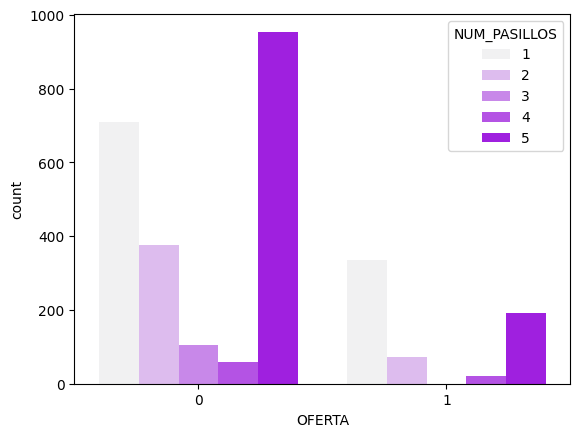

In [158]:
sns.countplot(x ="OFERTA",hue = "NUM_PASILLOS", data = df,color = "#aa00ff")

17.¿Cuántos productos se venden a granel y cuántos por unidad?

In [29]:
g = df[df["ATRIBUTOS"].str.contains(" g", case = False, regex = False)].value_counts().sum()
u = df[df["ATRIBUTOS"].str.contains(" un", case = False, regex = False)].value_counts().sum()
print(f"Hay {g} productos a que se venden a granel.")
print(f"Hay {u} productos que se venden por unidad.")

Hay 23 productos a que se venden a granel.
Hay 2764 productos que se venden por unidad.


18.¿Cuántos productos de los que hay en stock se les está aplicando oferta?

In [30]:
cond = df[df['OFERTA']==1]
prductos_stock_con_ofertas=cond.groupby('OFERTA')['STOCK'].value_counts().sum()
print(f'Hay un total de {prductos_stock_con_ofertas} productos en stock que tienen una oferta aplicada')

Hay un total de 623 productos en stock que tienen una oferta aplicada


19.¿Qué está ocurriendo con el Producto "Aceite de Oliva extra virgen 250 ml" en temas de oferta y demanda?

In [31]:
df[df['NOMBRE_PRODUCTO']=="ACEITE DE OLIVA EXTRA VIRGEN 250 ML"]

,NOMBRE_PRODUCTO,MARCA,PRECIO_SIN_OFERTA,PRECIO_OFERTA_MIN,PRECIO_OFERTA_MAX,OFERTA,ZONA_SUPERMERCADO,NUM_PASILLOS,TIPO_PRODUCTO,DATATIME,ATRIBUTOS,STOCK,CANTIDAD_STOCK,PAGE


20.Ofrece recomendaciones específicas para mejorar la calidad de los datos y sugerir acciones futuras para la gestión del inventario.

In [32]:
df

,NOMBRE_PRODUCTO,MARCA,PRECIO_SIN_OFERTA,PRECIO_OFERTA_MIN,PRECIO_OFERTA_MAX,OFERTA,ZONA_SUPERMERCADO,NUM_PASILLOS,TIPO_PRODUCTO,DATATIME,ATRIBUTOS,STOCK,CANTIDAD_STOCK,PAGE
0,PASTA_DENTAL_ULTRA_BLANCO_3_UN._90_G_C/U,Colgate,2.194894,2.849000,3.57390,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,31,1
1,PASTA_DENTAL_TRIPLE_3_UN._90_G,Pepsodent,2.194894,3.069000,3.27690,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,25,1
2,JABÓN_LÍQUIDO_DERMO_CARE_AVENA_DOYPACK_750_ML,Simond'S,1.703900,0.641355,0.66124,0,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,20,1
3,JABÓN_LÍQUIDO_ORIGINAL_700_ML,Dove,2.194894,2.924900,3.90390,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,31,1
4,PASTA_DENTAL_XTRA_WHITENING_3_UN._90_G,Pepsodent,2.194894,2.348500,3.27690,1,supermercados,1,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,CAMARONES_ENTEROS_400_G,Cuisine & Co,6.479000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,10,1
4464,CARPACCIO_DE_VACUNO_CONGELADO_320_G,Cuisine & Co,8.402900,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,41,1
4465,CROQUETA_SALMÓN_80_G,Aqua,0.869000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,34,1
4466,CAMARONES_COCIDOS_Y_PELADOS_500_G,Cuisine & Co,7.216000,0.641355,0.66124,0,supermercados,1,pescaderia,2022-07-16 22:00:45.289537,1 un,1,35,2
